<a href="https://colab.research.google.com/github/EstherHadsa/Customer-Segmentation-using-Kmeans-/blob/main/Customer_Segmentation_Esther_Waweru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Definition**
The owner of amall would want to understand his customers. He wants this information to be passed to the marketing team so as to help come with marketing strategies targeted to the right people.

# **Metric Success**
This project will be considered a success if : 

1.   Able to achieve segmentation using Machine Learning K-means clustering
2.   Able to identify our target customers




# **Context**
This data was obtained from [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download) for the purpose of dividing the customers into different groups.

# **Experimental Design**
Below are steps taken to make this project a success:


1.   Data Overview
2.   Data Cleaning
3.   EDA process

     a. Univariate analysis

     b.Bivariate analysis

     c. Multivariate analysis

4. Data Preprocessing
5. Build the model
6. Interpret the model

# **Understanding our data**

The dataset is a customer database of a mall. It contains 200 observations and 5 columns namely:


1. Age
2. Gender
3. Annual Income (k$)
4. Spending Score (1-100)
5. Customer ID



1. **Data Exploration**

In [266]:
#Import our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [267]:
#Load our data
mall_df = pd.read_csv('/content/Mall_Customers.csv')
#Check first five records
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [268]:
#Check shape our data
shape = mall_df.shape
print('Our dataset has ',shape[0],' rows and ',shape[1], 'columns')

Our dataset has  200  rows and  5 columns


In [269]:
#Check the column names of our dataset
for col in mall_df.columns :
  print(col)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


In [270]:
#Check datatypes 
mall_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [271]:
#Summary of our dataser
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


2. **Data Cleaning**

In [272]:
#Check for missing values
mall_df.isnull().sum()
#Our dataset has no missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [273]:
#Check for duplicates
mall_df.duplicated()
#Our dataset has no duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [274]:
#Fix messy columns
mall_df = mall_df.rename({'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},axis = 1)
mall_df.columns = mall_df.columns.str.strip().str.lower().str.replace(' ','_')
mall_df.columns

Index(['customerid', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

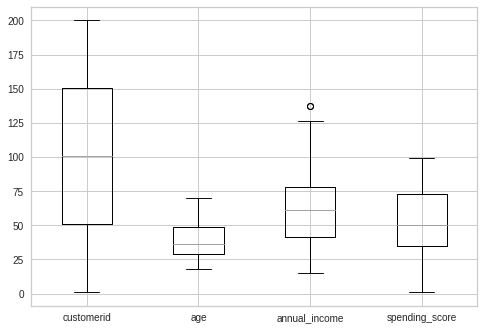

In [275]:
#Check for boxplots
mall_df.boxplot()

#The column annual income has outliers but decide to keep them.

3. **Univariate analysis **

  a. Gender
     

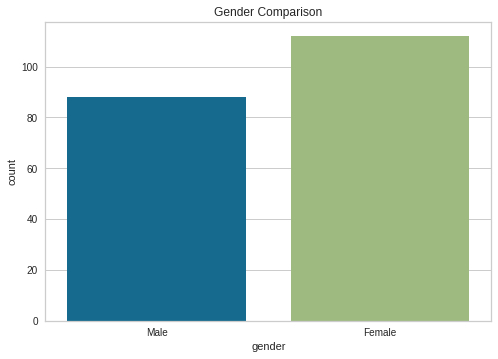

In [276]:
#Plot a countplot
sns.countplot(data= mall_df ,x ='gender')

plt.title('Gender Comparison')
plt.show()
#There are more females than males

Age Description
count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64


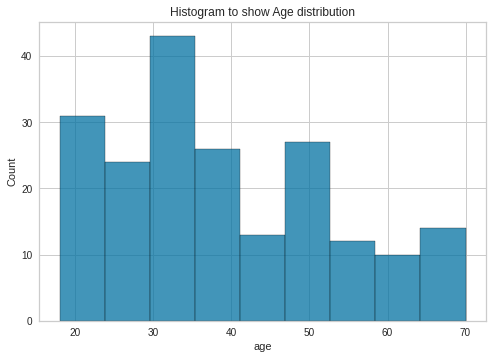

In [277]:
#Numerical variables
#Age
print('Age Description')
print(mall_df['age'].describe())

#Age distribution
sns.histplot(mall_df['age'])
plt.title('Histogram to show Age distribution')
plt.show()

#The minimum age for customers is 18 while maximum age is 70
#The mean age for the customers is 38
#Age mostly follows a normal distribution

Decription for annual income
count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: annual_income, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


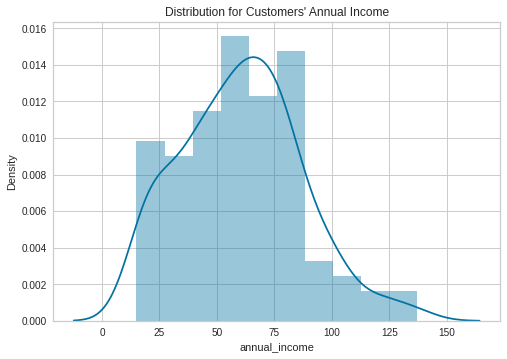

In [278]:
#Annual Income
print('Decription for annual income')
print(mall_df['annual_income'].describe())

#Check distribution
sns.distplot(mall_df['annual_income'])
plt.title("Distribution for Customers' Annual Income")
plt.show()

#Minimum annual Income for customer is 15k$ while maximum annual income is 137k$
#Mean annual Income is 60.56k$
#Annual income follows a normal distribution

Description of Spending Score
count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending_score, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


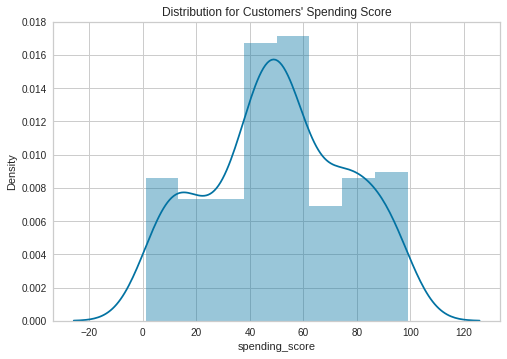

In [279]:
#Spending score
print('Description of Spending Score')
print(mall_df['spending_score'].describe())

#Distribution of Spending score
sns.distplot(mall_df['spending_score'])
plt.title("Distribution for Customers' Spending Score")
plt.show()

#The minimum spending score is 1 and maximum is 99.
#The average spending score is 50.20


4. Bivariate Analysis

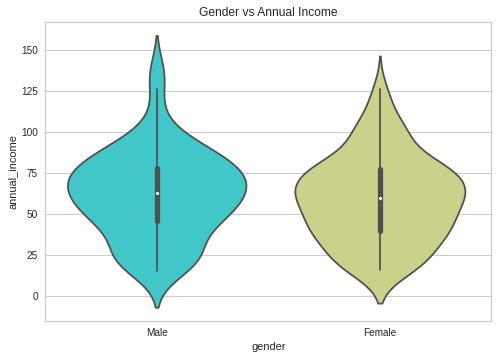

In [280]:
#Gender vs Annual Income
#Plot a violinplot
sns.violinplot(x = 'gender', y = 'annual_income',data = mall_df, palette = 'rainbow')
plt.title('Gender vs Annual Income')
plt.show()

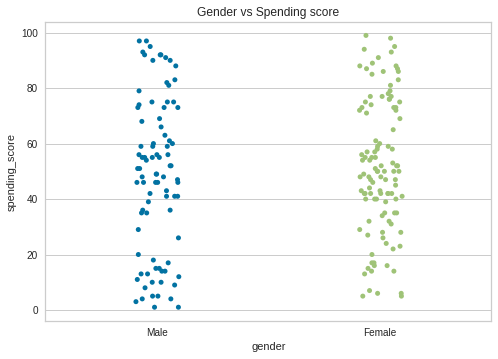

In [281]:
#Gender vs Spending score
#Plot a stripplot
sns.stripplot(x = 'gender', y = 'spending_score',data = mall_df)
plt.title('Gender vs Spending score')
plt.show()

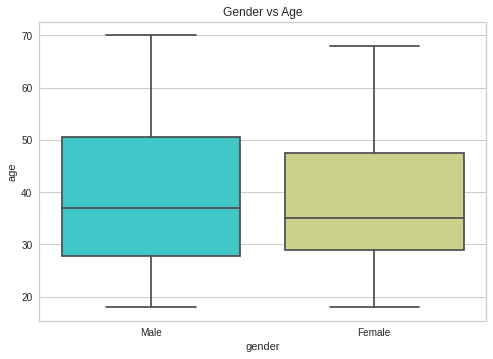

In [282]:
#Gender vs Age
#Plot a boxplot
sns.boxplot(x = 'gender', y = 'age',data = mall_df, palette = 'rainbow')
plt.title('Gender vs Age')
plt.show()

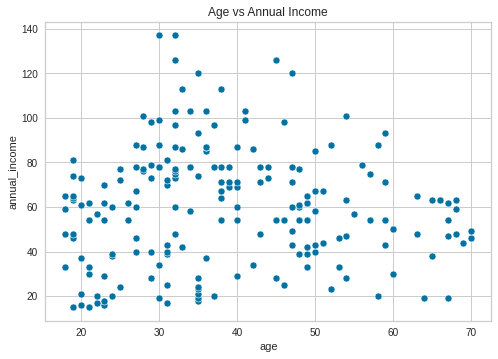

In [283]:
#Age vs Annual Income
sns.scatterplot(x = 'age', y = 'annual_income', data = mall_df)
plt.title('Age vs Annual Income')
plt.show()

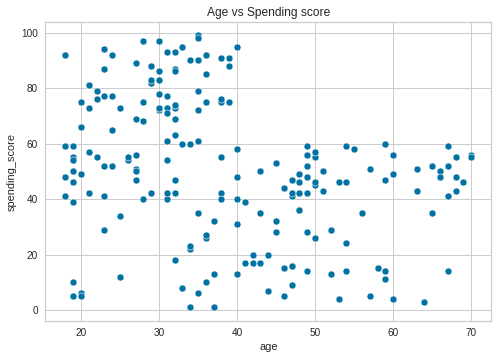

In [284]:
#Age vs Spending score
sns.scatterplot(x = 'age', y = 'spending_score', data = mall_df)
plt.title('Age vs Spending score')
plt.show()

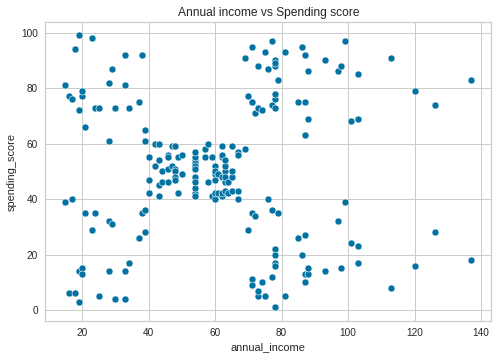

In [285]:
#Annual vs Spending Score
sns.scatterplot(x = 'annual_income', y = 'spending_score', data = mall_df)
plt.title('Annual income vs Spending score')
plt.show()

5.**Multivariate Analysis**

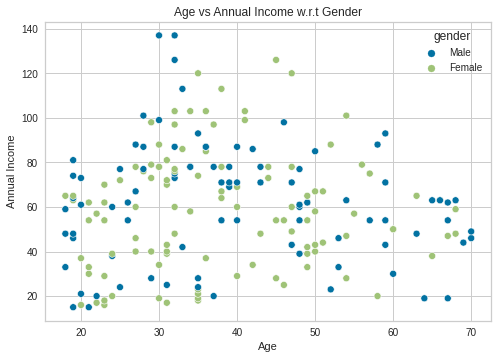

In [286]:
#Age vs Income with respect to gender
sns.scatterplot(x = 'age', y = 'annual_income',hue = mall_df['gender'], data = mall_df)
plt.title('Age vs Annual Income w.r.t Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend
plt.show()

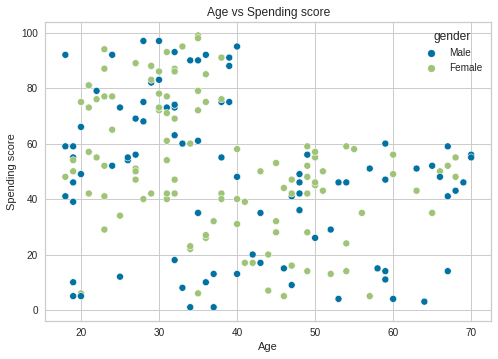

In [287]:
#Age vs Spending score w.r.t Gender
sns.scatterplot(x = 'age', y = 'spending_score',hue = mall_df['gender'], data = mall_df)
plt.title('Age vs Spending score')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend
plt.show()


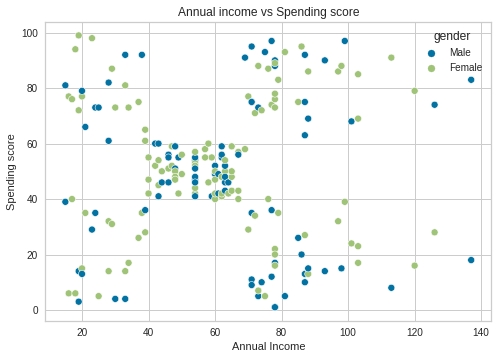

In [288]:
#Income vs Spending score w.r.t Gender
sns.scatterplot(x = 'annual_income', y = 'spending_score',hue = mall_df['gender'],  data = mall_df)
plt.title('Annual income vs Spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend
plt.show()

                customerid       age  annual_income  spending_score
customerid        1.000000 -0.026763       0.977548        0.013835
age              -0.026763  1.000000      -0.012398       -0.327227
annual_income     0.977548 -0.012398       1.000000        0.009903
spending_score    0.013835 -0.327227       0.009903        1.000000


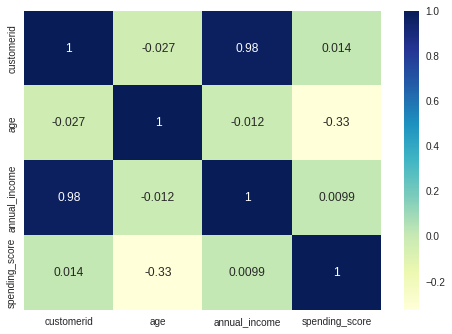

In [289]:
#Find the correlation
dat_corr = mall_df.corr()
print(dat_corr)

#plotting correlation heatmap
dataplot = sns.heatmap(dat_corr, cmap="YlGnBu", annot=True)
plt.show()


**Data Preprocessing**

In [290]:
#Drop the customer_id column
mall_df.drop(['customerid'],axis = 1 , inplace = True)
mall_df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [291]:
#Label encode column gender
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
label_encode.fit(mall_df['gender'])

#View labels in column
print(label_encode.classes_)
#Transform categories into integers
mall_df['gender'] = label_encode.transform(mall_df['gender'])

#Check the new labels
name_mapping = dict(zip(label_encode.classes_, label_encode.transform(label_encode.classes_)))
print(name_mapping)


['Female' 'Male']
{'Female': 0, 'Male': 1}


In [292]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

col_names = ['age','annual_income','spending_score']
features = mall_df[col_names]
sc_features = sc.fit_transform(features.values)

new_df = pd.DataFrame(sc_features,columns = col_names)
new_df.head()


,age,annual_income,spending_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# **MODEL BUILDING**

1. Kmeans Clustering

In [293]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [294]:
#Import libraries
from sklearn.cluster import KMeans
from kneed import KneeLocator
from yellowbrick.cluster import SilhouetteVisualizer

a. Determine Optimal clusters

Elbow:  4


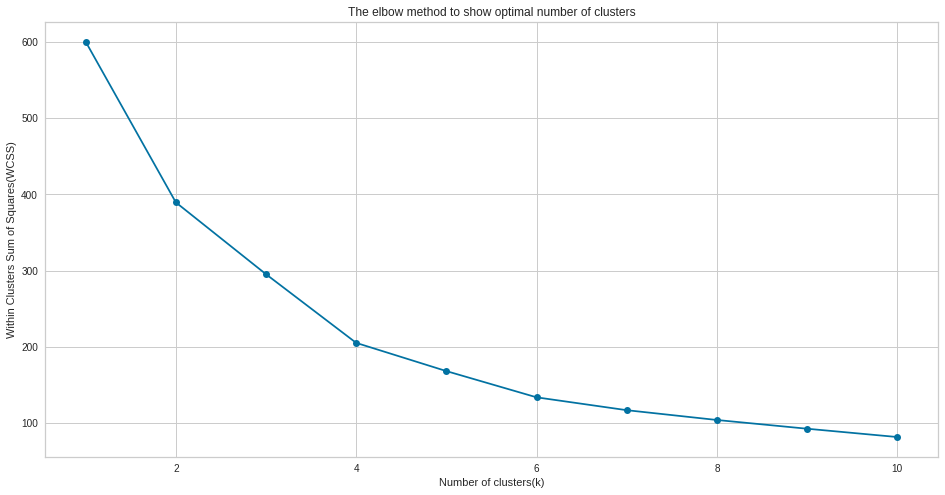

In [295]:
#Elbow method
#Run several kmeans , increment k with each iteration
#Location of a bend or knee is indication of optimal number of cluster

#WCSS(Within cluster sum of squares)
#SSE (Sum of Squared Errors)

wcss = []

K = range(1,11)
for k in K :
  kmeans = KMeans(n_clusters= k , random_state= 25)
  kmeans.fit(new_df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)
  

#Plot results
plt.figure(figsize=(16,8))
plt.plot(K , wcss , marker = "o")
plt.title('The elbow method to show optimal number of clusters')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within Clusters Sum of Squares(WCSS)')

#Identify elbow using the kneed package

kneedle = KneeLocator(x = K , y = wcss ,curve = 'convex', direction = 'decreasing',S = 1)
elbow_point = kneedle.elbow
print('Elbow: ', elbow_point)
#kneedle.plot_knee()


#The optimal number of clusters according to the elbow method is 4

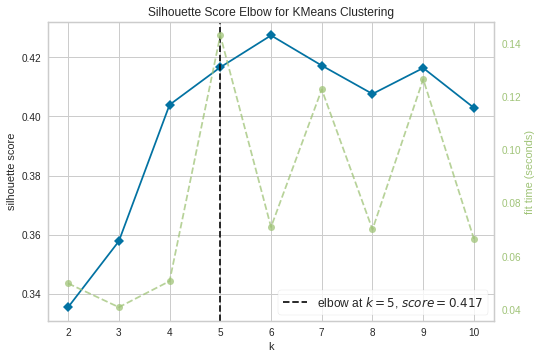

In [296]:
from yellowbrick.cluster.elbow import KElbowVisualizer
#Silhouette method
#Using KElbowVisualizer
# measure of how similar a data point is within-cluster (cohesion) 
#compared to other clusters (separation).
kmeans_1 = KMeans(random_state = 25)
visualizer = KElbowVisualizer(kmeans_1, k = range(2,11),metric = 'silhouette')
visualizer.fit(new_df)
visualizer.show()
plt.show()



From elbow method and silhouette score, we can say that the optimal number of clusters is either 4 or 5

Build a model with 4 clusters

In [297]:
model = KMeans(n_clusters = 4 , random_state = 25)
#Fit the data
model.fit(new_df)

#Create new df with the predicted clusters
clusters = model.fit_predict(mall_df)
data = new_df.copy()
data['Cluster'] = clusters
data.head()

,age,annual_income,spending_score,Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,1


Text(0, 0.5, 'Spending score')

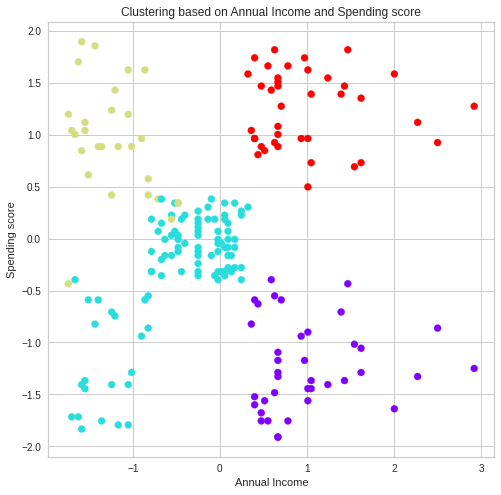

In [298]:
#Visualise the predicted clusters based on Annual Income and Spending score
plt.figure(figsize = (8,8))
plt.scatter(data['annual_income'],data['spending_score'], c = data['Cluster'], cmap = 'rainbow')
plt.title('Clustering based on Annual Income and Spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')



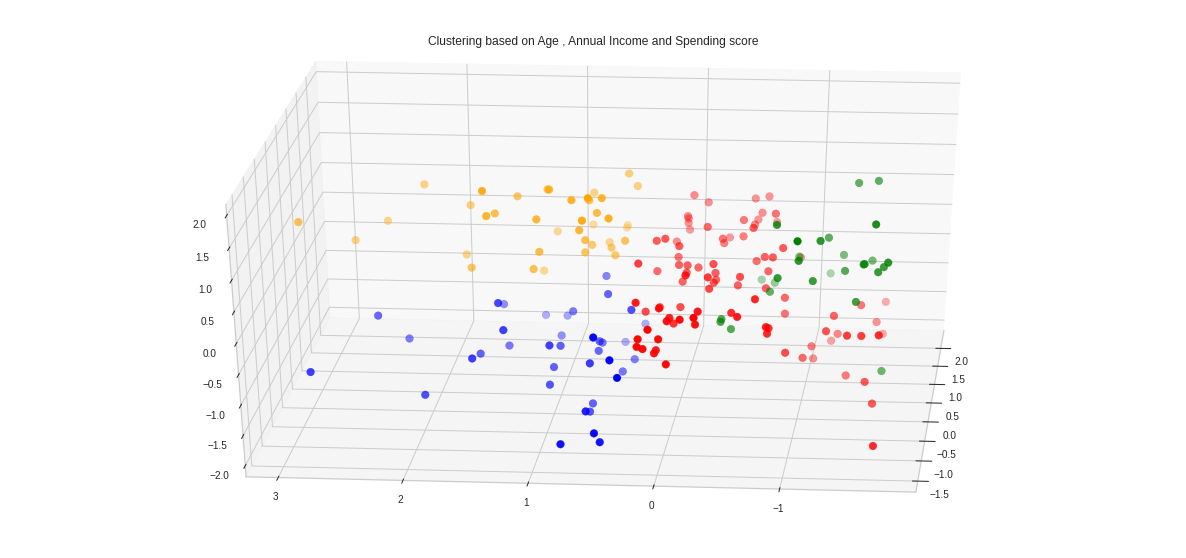

In [299]:
fig = plt.figure(figsize=(21,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.age[data.Cluster == 0], data["annual_income"][data.Cluster == 0], data["spending_score"][data.Cluster == 0], c='blue', s=60)

ax.scatter(data.age[data.Cluster == 1], data["annual_income"][data.Cluster == 1], data["spending_score"][data.Cluster == 1], c='red', s=60)
ax.scatter(data.age[data.Cluster == 2], data["annual_income"][data.Cluster == 2], data["spending_score"][data.Cluster == 2], c='green', s=60)
ax.scatter(data.age[data.Cluster == 3], data["annual_income"][data.Cluster == 3], data["spending_score"][data.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.title('Clustering based on Age , Annual Income and Spending score')
plt.show()

Model with 5 clusters

Text(0, 0.5, 'Spending score')

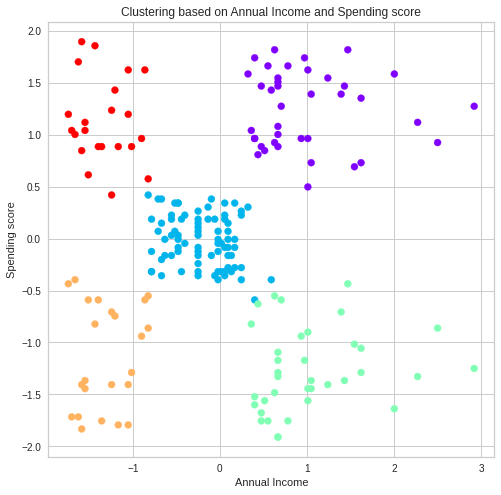

In [303]:
model = KMeans(n_clusters = 5 , random_state = 25)
#Fit the data
model.fit(new_df)

#Create new df with the predicted clusters
clusters = model.fit_predict(mall_df)
data_0 = new_df.copy()
data_0['Cluster'] = clusters
data_0.head()
#Visualise the predicted clusters based on Annual Income and Spending score
plt.figure(figsize = (8,8))
plt.scatter(data_0['annual_income'],data_0['spending_score'], c = data_0['Cluster'], cmap = 'rainbow')
plt.title('Clustering based on Annual Income and Spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')

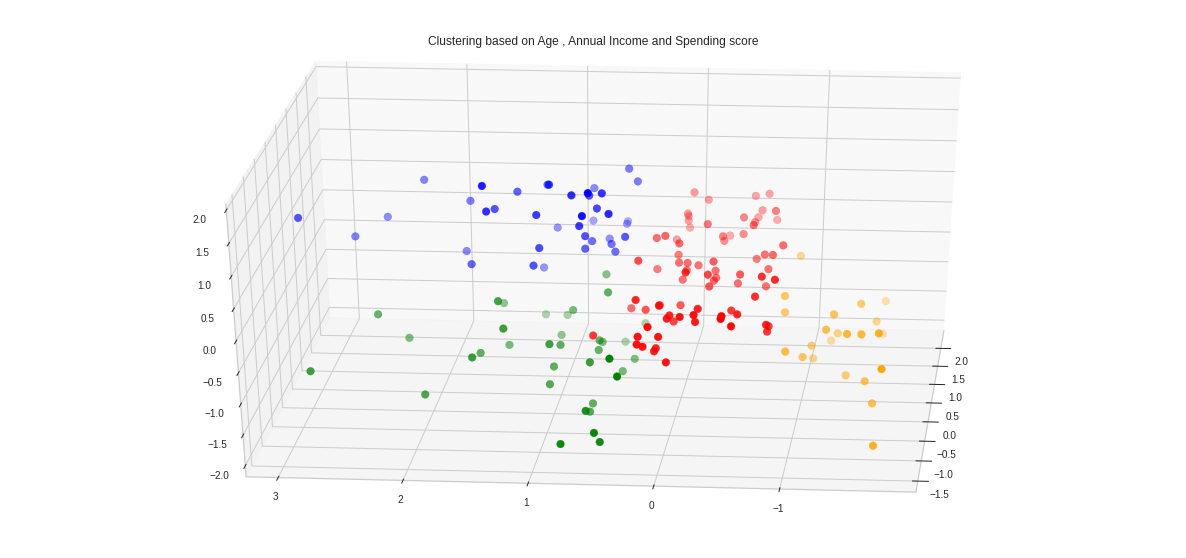

In [304]:
fig = plt.figure(figsize=(21,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_0.age[data_0.Cluster == 0], data_0["annual_income"][data_0.Cluster == 0], data_0["spending_score"][data_0.Cluster == 0], c='blue', s=60)

ax.scatter(data_0.age[data_0.Cluster == 1], data_0["annual_income"][data_0.Cluster == 1], data_0["spending_score"][data_0.Cluster == 1], c='red', s=60)
ax.scatter(data_0.age[data_0.Cluster == 2], data_0["annual_income"][data_0.Cluster == 2], data_0["spending_score"][data_0.Cluster == 2], c='green', s=60)
ax.scatter(data_0.age[data_0.Cluster == 3], data_0["annual_income"][data_0.Cluster == 3], data_0["spending_score"][data_0.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.title('Clustering based on Age , Annual Income and Spending score')
plt.show()

We can see that our model with 5 clusters does a better job than the one with 4 clusters. There's overlapping among different clusters.



**Build a new model that has better cluster separability**

The cumulative proportion
[0.44266167 0.77574546 1.        ]
Eigen values : 
[1.33465831 1.00427272 0.67614435]


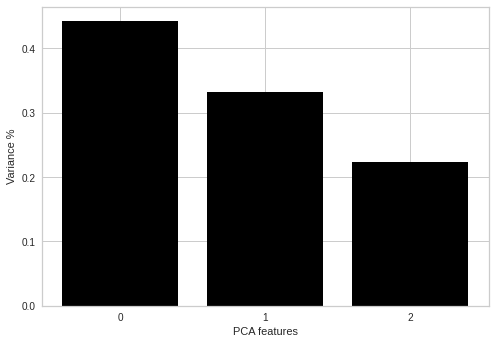

In [305]:
#Use PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pc_components = pca.fit_transform(new_df)

features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(pc_components)

print('The cumulative proportion')

print(np.cumsum(pca.explained_variance_ratio_))

#PCA_components.head()
print('Eigen values : ')
print(pca.explained_variance_)


Based on our visualization, the first 2 PCA components explain around 77.6% of the dataset variance. Their eigen values are either greater than 1  hence we can feed these two components into the model

Elbow:  4


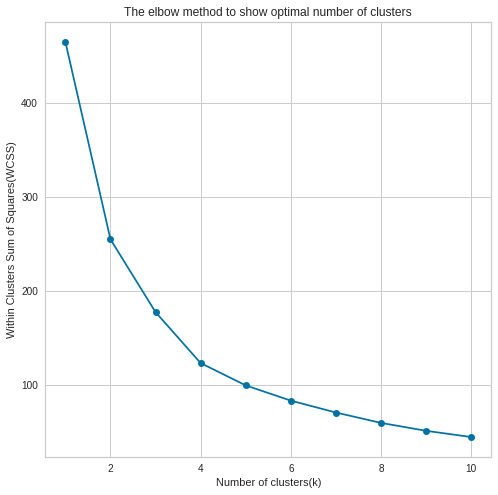

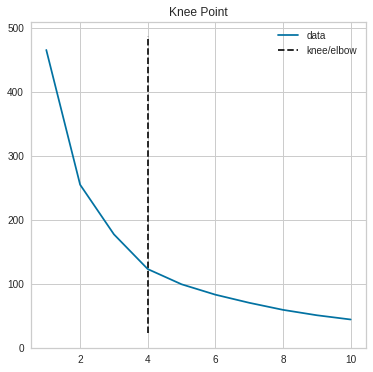

In [306]:
#Build model with the 2 PCs

wcss = []
ks = range(1,11)
for k in ks :
  kmeans = KMeans(n_clusters= k , random_state= 25)
  kmeans.fit(PCA_components.iloc[:,:2])
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)
  
#Plot results
plt.figure(figsize=(8,8))
plt.plot(K , wcss , marker = "o")
plt.title('The elbow method to show optimal number of clusters')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within Clusters Sum of Squares(WCSS)')

#Identify elbow using the kneed package

kneedle = KneeLocator(x = ks , y = wcss ,curve = 'convex', direction = 'decreasing')
elbow_point = kneedle.elbow
print('Elbow: ', elbow_point)
kneedle.plot_knee()


#The optimal number of is 4

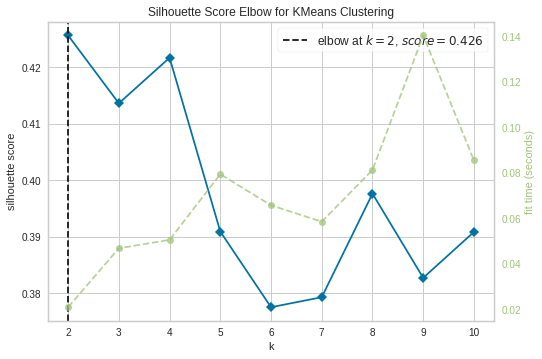

In [307]:
from yellowbrick.cluster.elbow import KElbowVisualizer
#Silhouette method
#Using KElbowVisualizer
# measure of how similar a data point is within-cluster (cohesion) 
#compared to other clusters (separation).
kmeans = KMeans(random_state = 25)
visualizer = KElbowVisualizer(kmeans, k = range(2,11),metric = 'silhouette')
visualizer.fit(PCA_components.iloc[:,:2])
visualizer.show()
plt.show()

The optimal number of clusters is 4 according to elbow method . For silhoutte score we can see clusters 2 and 4. I choose to go with 4 clusters as the silhouette score is higher than for the previous model.

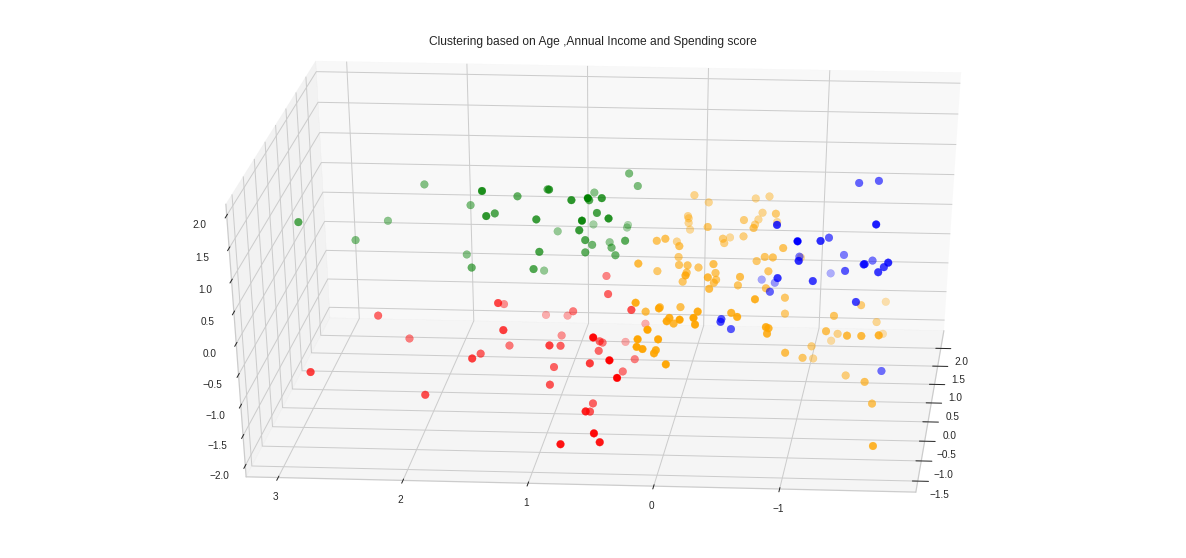

In [310]:
kmodel = KMeans(n_clusters=4).fit(PCA_components.iloc[:,:2])


clusters = kmodel.fit_predict(mall_df)
dat_2 = new_df.copy()
dat_2["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dat_2.age[dat_2.label == 0], dat_2["annual_income"][dat_2.label == 0], dat_2["spending_score"][dat_2.label == 0], c='blue', s=60)
ax.scatter(dat_2.age[dat_2.label == 1], dat_2["annual_income"][dat_2.label == 1], dat_2["spending_score"][dat_2.label == 1], c='red', s=60)
ax.scatter(dat_2.age[dat_2.label == 2], dat_2["annual_income"][dat_2.label == 2], dat_2["spending_score"][dat_2.label == 2], c='green', s=60)
ax.scatter(dat_2.age[dat_2.label == 3], dat_2["annual_income"][dat_2.label == 3], dat_2["spending_score"][dat_2.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.title('Clustering based on Age ,Annual Income and Spending score')
plt.show()

Text(0, 0.5, 'Spending score')

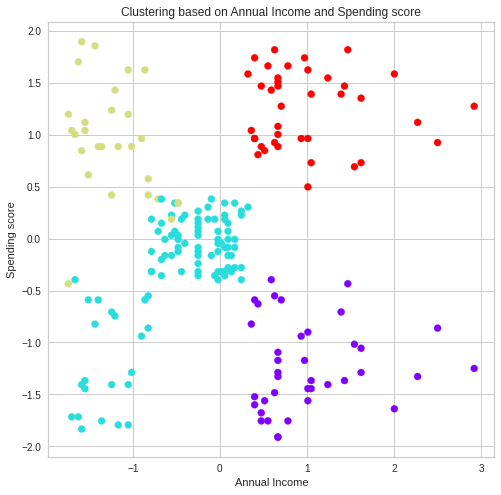

In [311]:
#Visualise the clusters
model_2 = KMeans(n_clusters= 4 , random_state= 25)
model_2.fit(PCA_components.iloc[:,:2])


clusters = model_2.fit_predict(mall_df)
data_2 = new_df.copy()
data_2['cluster'] = clusters

plt.figure(figsize = (8,8))
plt.scatter(data_2['annual_income'],data_2['spending_score'], c = data_2['cluster'], cmap = 'rainbow')
plt.title('Clustering based on Annual Income and Spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')



# **Compare the two models**

**Model 1 before PCA**

---


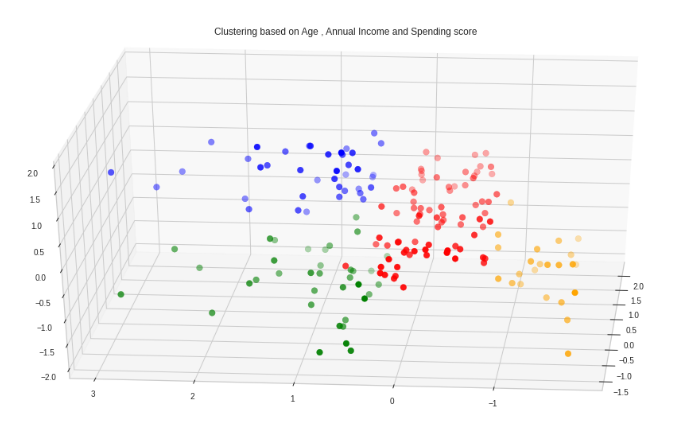


**Model 2 after PCA**


---


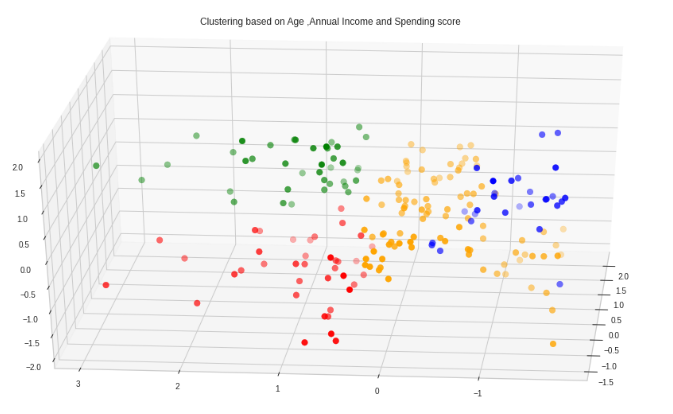


Notice that model 2 is much better separated than the first model as the silhouette score was higher. We pick the second model to do our analysis

# **Cluster analysis**

In [314]:
#Map the clusters to dataframe
clusters = model_2.fit_predict(PCA_components.iloc[:,:2])
mall_df['cluster'] = clusters
mall_df.head()

,gender,age,annual_income,spending_score,cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,2


In [318]:
#Find average of all attributes across each cluster
df = mall_df.copy()
df = df.drop('gender',axis = 1)
avg_df = df.groupby(['cluster'],as_index = False).mean()
avg_df

,cluster,age,annual_income,spending_score
0,0,52.144928,46.333333,40.072464
1,1,29.813559,79.000000,69.745763
2,2,25.605263,32.631579,67.500000
3,3,42.352941,88.647059,17.500000


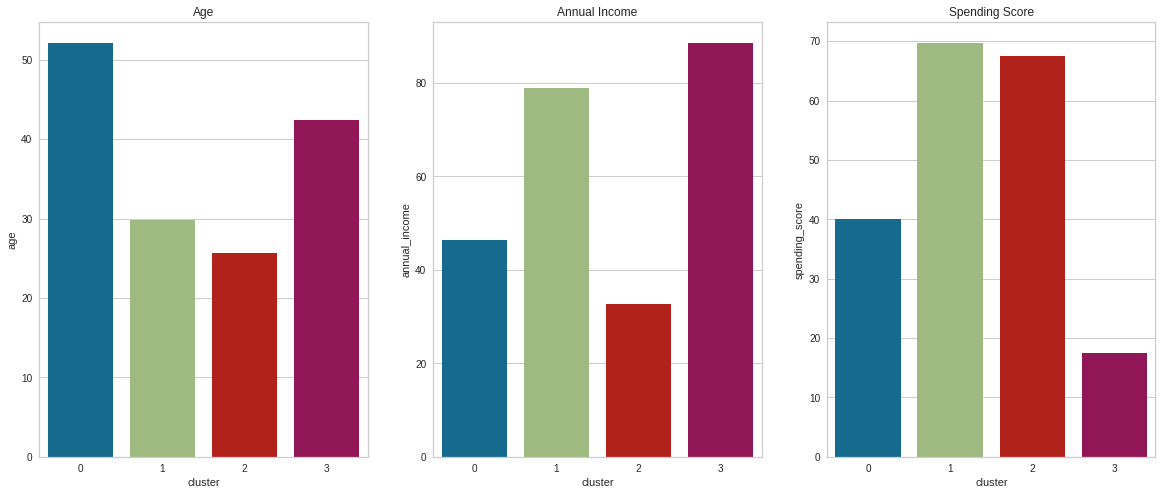

In [322]:
#Visualize each variable
fig, ax = plt.subplots(1,3, figsize = (20,8))
#Age
sns.barplot(x = 'cluster', y = 'age', data = avg_df, ax = ax[0])
ax[0].set_title('Age')

#Annual Income
sns.barplot(x = 'cluster', y = 'annual_income', data = avg_df, ax = ax[1])
ax[1].set_title('Annual Income')

#Spending Score
sns.barplot(x = 'cluster', y = 'spending_score', data = avg_df , ax = ax[2])
ax[2].set_title('Spending Score')


plt.show()


**Gender**

In [323]:
gend_df = pd.DataFrame(mall_df.groupby(['cluster','gender'])['gender'].count())
gend_df

#{'Female': 0, 'Male': 1}

gender
cluster gender        
0       0           40
        1           29
1       0           34
        1           25
2       0           23
        1           15
3       0           15
        1           19

In [324]:
mall_df.describe()

,gender,age,annual_income,spending_score,cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000,1.185000
std,0.497633,13.969007,26.264721,25.823522,1.089362
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,0.000000
50%,0.000000,36.000000,61.500000,50.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,2.000000
max,1.000000,70.000000,137.000000,99.000000,3.000000


# **Main attributes of each cluster**


 1.   ***Cluster 0 :***

      Mean age is around 52 and gender is predominantly female.
      
      It is also characterised by low to mid average income and average spending score
 2.   ***Cluster 1 :***

      Mean age is around 29 while gender is predominantly female.

      Characterised by high average income and high average spending score

3. ***Cluster 2 :***

    Mean age is 25.6 while gender is predominantly female.

    Characterised by low average annual income and high average spending score

4. ***Cluster 3 :***

    Mean age is 42 while gender is predominantly male.
    
    Characterised by high average annual income and low average spending score.

